In [1]:
import pandas as pd

In [2]:
import json

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
# load as Pandas DataFrame
df = pd.read_json('data/world_bank_projects.json')

In [6]:
# look at first 5 entries
df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [7]:
# look at column names
df.columns

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')

In [8]:
# note shape of DataFrame
df.shape

(500, 50)

In [9]:
# look at information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sector                    500 non-null    object
 1   supplementprojectflg      498 non-null    object
 2   projectfinancialtype      500 non-null    object
 3   prodline                  500 non-null    object
 4   mjtheme                   491 non-null    object
 5   idacommamt                500 non-null    int64 
 6   impagency                 472 non-null    object
 7   project_name              500 non-null    object
 8   mjthemecode               500 non-null    object
 9   closingdate               370 non-null    object
 10  totalcommamt              500 non-null    int64 
 11  id                        500 non-null    object
 12  mjsector_namecode         500 non-null    object
 13  docty                     446 non-null    object
 14  sector1                   

In [ ]:
# question 1: Find the 10 countries with most projects

In [10]:
# find top 10 most common values in 'countryname' column
df['countryname'].value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

In [11]:
# find top 10 most common values that are actual countries
# omit Africa, since it is a continent using drop method
# convert to new DataFrame
most_projects = df['countryname'].value_counts().head(11).drop('Africa').rename_axis('Country Name').to_frame('Number of Projects')
most_projects

,Number of Projects
Country Name,
Republic of Indonesia,19
People's Republic of China,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Kingdom of Morocco,12
Nepal,12
Republic of Mozambique,11


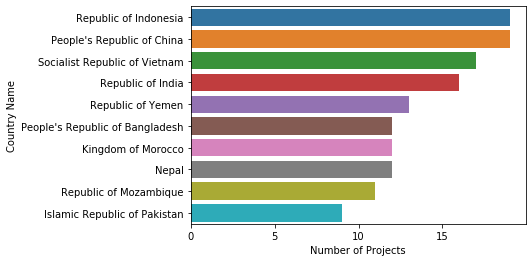

In [12]:
# plot countries with most projects
# set tick spacing to eliminate decimal values
sns.barplot(x='Number of Projects', y=most_projects.index, data=most_projects).xaxis.set_major_locator(ticker.MultipleLocator(5))

In [ ]:
# question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [13]:
# look at first row of column in question
df['mjtheme_namecode'][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [14]:
# look at another row containing more dicts
df['mjtheme_namecode'][2]

[{'code': '5', 'name': 'Trade and integration'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '6', 'name': 'Social protection and risk management'}]

In [15]:
# note stucture is nested arbitrary number of dicts in lists
df.mjtheme_namecode.head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [16]:
# flatten nested lists of dicts to make single list of dicts for easier data manipulation
flat_list = [val for pair in df['mjtheme_namecode'] for val in pair]
flat_list[:5]

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': ''},
 {'code': '1', 'name': 'Economic management'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '5', 'name': 'Trade and integration'}]

In [17]:
# make new DataFrame with flat_list
new_df = pd.DataFrame(flat_list)
new_df.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [18]:
# find top 10 project themes with most frequency
new_df.name.value_counts().nlargest(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [19]:
# eliminate unnamed projects using not equal method
# convert to DataFrame
most_themed_projects = new_df.loc[new_df.name.ne('')].name.value_counts().nlargest(10).rename_axis('Project Type').to_frame('Number of Projects')
most_themed_projects

,Number of Projects
Project Type,
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
Social dev/gender/inclusion,119
Trade and integration,72
Urban development,47


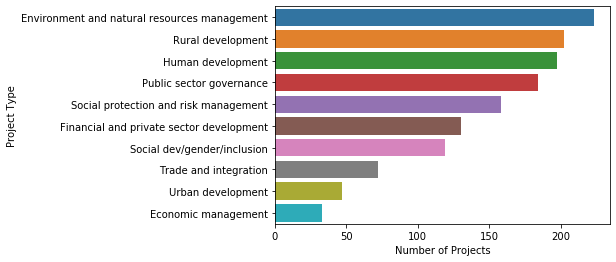

In [20]:
# plot most common project themes
sns.barplot(x='Number of Projects', y=most_themed_projects.index, data=most_themed_projects)

In [ ]:
# question 3: In 2. above you will notice that some entries have only the code and the name is missing. 
#             Create a dataframe with the missing names filled in.

In [21]:
# make set of tuples by pairing 'code' with 'name'

# initiatlize empty set
code_name_set = set([])
# iterate through rows of column
for row in df.mjtheme_namecode:
    # iterate through dicts of row
    for d in row:
        # select rows with values for 'names' key & add to set
        if d['name'] != '':
            code_name_set.add((d['code'], d['name']))
code_name_set

{('1', 'Economic management'),
 ('10', 'Rural development'),
 ('11', 'Environment and natural resources management'),
 ('2', 'Public sector governance'),
 ('3', 'Rule of law'),
 ('4', 'Financial and private sector development'),
 ('5', 'Trade and integration'),
 ('6', 'Social protection and risk management'),
 ('7', 'Social dev/gender/inclusion'),
 ('8', 'Human development'),
 ('9', 'Urban development')}

In [22]:
# convert set to list
code_name_list = list(code_name_set)
code_name_list

[('4', 'Financial and private sector development'),
 ('7', 'Social dev/gender/inclusion'),
 ('2', 'Public sector governance'),
 ('9', 'Urban development'),
 ('3', 'Rule of law'),
 ('5', 'Trade and integration'),
 ('10', 'Rural development'),
 ('1', 'Economic management'),
 ('11', 'Environment and natural resources management'),
 ('8', 'Human development'),
 ('6', 'Social protection and risk management')]

In [23]:
# look at one row with an empty string
df.mjtheme_namecode[0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [24]:
# find 'code' key value for dicts that have empty string for 'name' key value

# iterate through rows of column
for row in df.mjtheme_namecode:
    # iterate through dicts of row
    for d in row:
        # select dicts with empty string
        if d['name'] == '':
            # unpack tuples in code_name_list
            for code, name in code_name_list:
                # get 'name' corresponding to 'code' from correct tuple values
                if code == d['code']:
                    # insert 'name' in dict
                    d['name'] = name

In [25]:
# look at same row to verify that 'name' has a new value
df.mjtheme_namecode[0]

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': 'Environment and natural resources management'}]